In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# file_path = '/content/drive/My Drive/sem5 project/SLYieldData.csv'
# df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive//sem5 project/Sri Lanka 3-Month Bond Yield Historical Data .csv',index_col="Date",parse_dates=True)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/5th sem project/SLYieldData.csv', index_col='Date', parse_dates=True)
# df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5th sem project/2009-2018 - 3-Month Bond Yield Historical Data (2).csv',index_col="Date",parse_dates=True)

df4

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5th sem project/2008-2022 - 3-Month Bond Yield Historical Data (2).csv',index_col="Date",parse_dates=True)

In [ ]:
df2.head()

,Price,Open,High,Low,Change %
Date,,,,,
2022-07-10,33.10,28.50,33.10,28.50,16.14%
2022-07-03,28.50,22.57,30.00,22.57,26.27%
2022-06-26,22.57,21.25,22.57,21.25,6.21%
2022-06-19,21.25,20.50,21.50,20.50,3.66%
2022-06-12,20.50,20.50,20.50,20.50,0.00%


In [ ]:
df2.reset_index(inplace=True)
df2['Date'] = df2['Date'].astype(str)

valid_date_pattern = r'^\d{4}-\d{2}-\d{2}'
df2 = df2[df2['Date'].str.match(valid_date_pattern)]
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      693 non-null    object 
 1   Price     693 non-null    float64
 2   Open      693 non-null    float64
 3   High      693 non-null    float64
 4   Low       693 non-null    float64
 5   Change %  693 non-null    object 
dtypes: float64(4), object(2)
memory usage: 32.6+ KB


In [ ]:
df2.head(10)

,Date,Price,Open,High,Low,Change %
0,2022-07-10,33.10,28.50,33.10,28.50,16.14%
1,2022-07-03,28.50,22.57,30.00,22.57,26.27%
2,2022-06-26,22.57,21.25,22.57,21.25,6.21%
3,2022-06-19,21.25,20.50,21.50,20.50,3.66%
4,2022-06-12,20.50,20.50,20.50,20.50,0.00%
5,2022-06-05,20.50,22.75,22.75,20.50,-9.89%
6,2022-05-29,22.75,23.00,23.00,22.75,-9.00%
7,2022-05-22,25.00,23.00,25.00,21.75,8.70%
8,2022-05-15,23.00,23.00,23.00,23.00,0.00%
9,2022-05-08,23.00,23.00,23.00,23.00,0.00%


In [ ]:
# df2=df2[['Price']]
# df = df[['X3M']]
df2.tail()

,Date,Price,Open,High,Low,Change %
688,2009-04-26,12.942,12.942,12.942,12.942,-4.35%
689,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
690,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
691,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
692,2009-03-29,14.481,14.481,14.481,14.481,19.43%


In [ ]:
df2 = df2.iloc[::-1].reset_index(drop=False)
# df2 = df2.sort_values('Date')
# Display the reversed DataFrame
df2.head()

,index,Date,Price,Open,High,Low,Change %
0,692,2009-03-29,14.481,14.481,14.481,14.481,19.43%
1,691,2009-04-05,14.428,14.428,14.428,14.428,-0.37%
2,690,2009-04-12,14.350,14.350,14.350,14.350,-0.54%
3,689,2009-04-19,13.530,13.530,13.530,13.530,-5.71%
4,688,2009-04-26,12.942,12.942,12.942,12.942,-4.35%


In [ ]:
df2.index = df2['Date']
df2.drop('Date', axis=1, inplace=True)
df2 = df2[['Price']]
df2.head()

,Price
Date,
2009-03-29,14.481
2009-04-05,14.428
2009-04-12,14.350
2009-04-19,13.530
2009-04-26,12.942


<Axes: xlabel='Date'>

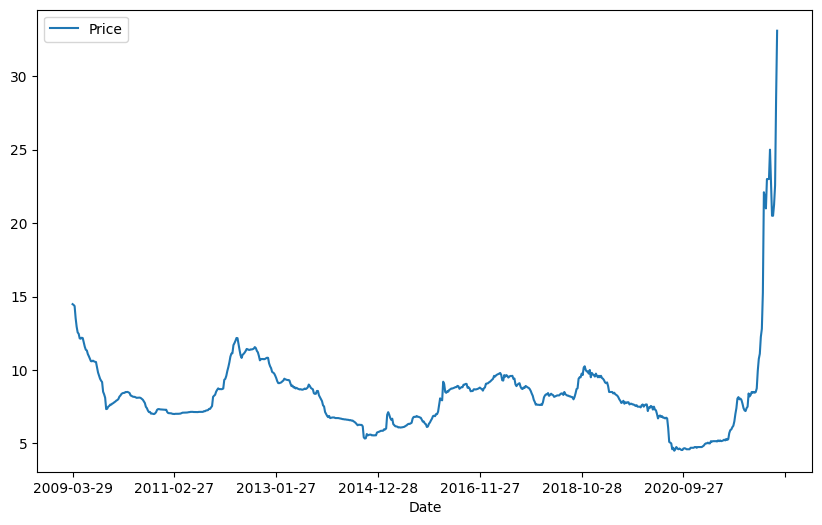

In [ ]:
df2.plot(figsize=(10, 6))

In [ ]:
# ThreeMonths = df.loc[:,'X3M']
# ThreeMonths.plot(figsize=(10, 6))

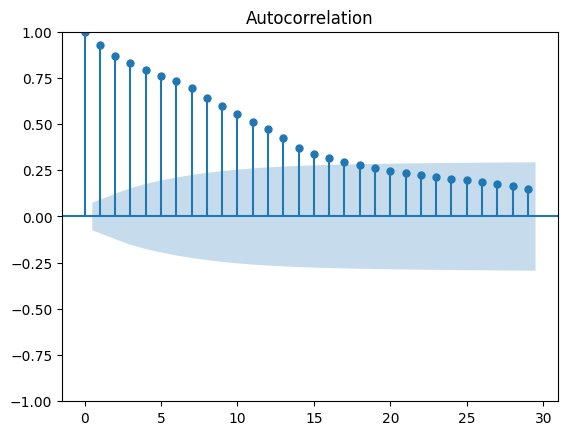

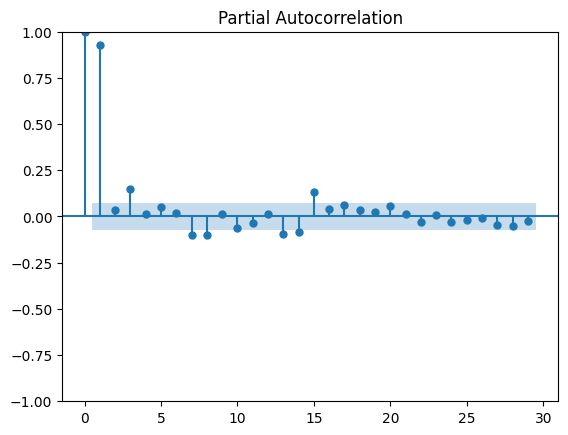

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df2.index = pd.to_datetime(df2.index)
# df.index = pd.to_datetime(df.index)

# Plot the autocorrelation function
plot_acf(df2['Price'])
plot_pacf(df2['Price'])
plt.show()

In [ ]:
# results = seasonal_decompose(df['X3M'],period=3)
# results.plot()

In [ ]:
len(df2)
data = df2[['Price']]
# data = df[['X3M']]

print(data)

             Price
Date              
2009-03-29  14.481
2009-04-05  14.428
2009-04-12  14.350
2009-04-19  13.530
2009-04-26  12.942
...            ...
2022-06-12  20.500
2022-06-19  21.250
2022-06-26  22.570
2022-07-03  28.500
2022-07-10  33.100

[693 rows x 1 columns]


In [ ]:
train_size = int(len(data)*0.8)  # Have to multiply by 0.8
train = data[:train_size]
test = data[train_size:]

In [ ]:
train.tail()

,Price
Date,
2019-10-06,7.70
2019-10-13,7.65
2019-10-20,7.65
2019-10-27,7.60
2019-11-03,7.55


In [ ]:
scaler = StandardScaler()                       # MinMaxScaler()

scaler.fit(train)


train_scaled = scaler.transform(train)

test_scaled = scaler.transform(test)


In [ ]:
numberOfInput = 10
n_features = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length=numberOfInput, batch_size=1)

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, input_shape=(numberOfInput, n_features),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
model.fit(generator,epochs=15, callbacks=[early_stopping])

Epoch 1/15
  6/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.1781

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.1265
Epoch 2/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0496
Epoch 3/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0486
Epoch 4/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0317
Epoch 5/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0310
Epoch 6/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0290
Epoch 7/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0300
Epoch 8/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0293
Epoch 9/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0271
Epoch 10/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0268
Epoch 11/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0230
Epoch 12/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0241
Epoch 13/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0223
Epoch 14/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0323
Epoch 15/15
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [ ]:
# model.summary()

In [ ]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
train_predictions = model.predict(train_scaled)
test_predictions = model.predict(test_scaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# test_predictions = []

# arr = np.array([1,2,3])
# filename = '/content/drive/MyDrive/Colab Notebooks/5th sem project'
# np.save(filename,first_eval_batch)
# current_batch = first_eval_batch.reshape((1, numberOfInput, n_features))

# for i in range(len(test_scaled)):
#     current_pred = model.predict(current_batch)[0]
#     test_predictions.append(current_pred)
#     current_batch = np.append(current_batch[:, 1:, :],[[current_pred]], axis=1)
#     print(current_batch)

In [ ]:
# first_eval_batch

In [ ]:
true_train_predictions = scaler.inverse_transform(train_predictions)
true_test_predictions = scaler.inverse_transform(test_predictions)


In [ ]:
# Assuming the date index matches the length of predictions
train_prediction_dates = data.index[:train_size]
test_prediction_dates = data.index[train_size:]

# Create DataFrame for predictions
train_predictions_df = pd.DataFrame(data=true_train_predictions, index=train_prediction_dates, columns=['Train Predictions'])
test_predictions_df = pd.DataFrame(data=true_test_predictions, index=test_prediction_dates, columns=['Test Predictions'])

# Merge the original DataFrame with the predictions DataFrame
combined_df = df2.join(train_predictions_df, how='left')
combined_df = combined_df.join(test_predictions_df, how='left')


In [ ]:
combined_df.head()

,Price,Train Predictions,Test Predictions
Date,,,
2009-03-29,14.481,13.390515,NaN
2009-04-05,14.428,13.365212,NaN
2009-04-12,14.350,13.327456,NaN
2009-04-19,13.530,12.891385,NaN
2009-04-26,12.942,12.531781,NaN


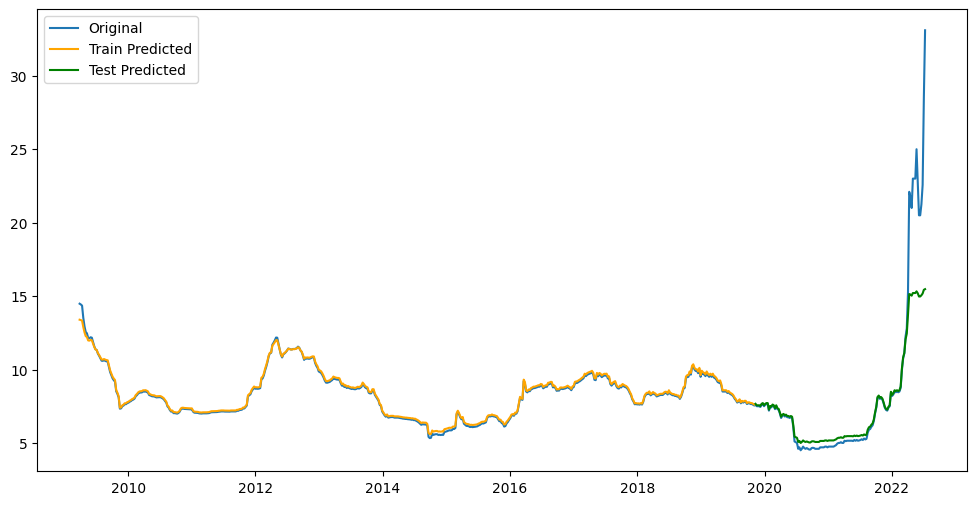

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Price'], label='Original')
plt.plot(combined_df['Train Predictions'], label='Train Predicted', color='orange')
plt.plot(combined_df['Test Predictions'], label='Test Predicted', color='green')
plt.legend()
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models/2009-2022 full train')

In [ ]:
# from keras.models import load_model

# model1 =  load_model('/content/drive/MyDrive/Colab Notebooks/5th sem project/Models')

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5th sem project/2017-2024 - 3-Month Bond Yield Historical Data (2).csv',index_col="Date", parse_dates=True)

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive//sem5 project/Sri Lanka 3-Month Bond Yield Historical Data .csv',index_col="Date",parse_dates=True)

In [ ]:
df3 = df3[['Price']]
df3 =df3.iloc[::-1].reset_index(drop=False)
df3.index = df3['Date']
df3.drop('Date', axis=1,inplace=True)


In [ ]:
first_eval_batch = test_scaled[-numberOfInput:]

In [ ]:
from datetime import datetime

def weeks_between_dates(fixed_date, given_date):
    # Ensure dates are in datetime format
    if isinstance(fixed_date, str):
        fixed_date = datetime.strptime(fixed_date, "%Y-%m-%d")
    if isinstance(given_date, str):
        given_date = datetime.strptime(given_date, "%Y-%m-%d")

    # Calculate the difference in days
    delta_days = (given_date - fixed_date).days

    # Convert days to weeks
    weeks = delta_days // 7
    weeks += 1 if delta_days % 7 > 0 else 0

    return weeks

# Example usage:
fixed_date =  '2022-07-10'      #"2015-06-14"

In [ ]:
df3.tail(100)

,Price
Date,
2022-07-17,30.00
2022-07-31,30.00
2022-08-07,29.00
2022-08-14,27.50
2022-08-21,29.25
...,...
2024-06-09,9.10
2024-06-16,9.30
2024-06-23,10.05


In [ ]:

def getPredictions(model,date,curr_set):
  predictions= []
  weeks = weeks_between_dates(fixed_date,date)
  initial_set = np.array(curr_set).reshape(1, -1)
  for week in range(weeks):
    curr_set = np.array(initial_set).reshape(1, -1)
    current_pred = model.predict(curr_set, verbose=0)
    predictions.append(current_pred)
    initial_set = np.append(initial_set[:, 1:],current_pred, axis=1)
    print(scaler.inverse_transform(initial_set))
    # print(predictions)
  return predictions


In [ ]:
scaler.inverse_transform(first_eval_batch).flatten()

array([23.  , 23.  , 25.  , 22.75, 20.5 , 20.5 , 21.25, 22.57, 28.5 ,
       33.1 ])

In [ ]:
Future_date = '2024-01-08'
result = getPredictions(model,Future_date,first_eval_batch)

[[23.         25.         22.75       20.5        20.5        21.25
  22.57       28.5        33.1        20.89825265]]
[[25.         22.75       20.5        20.5        21.25       22.57
  28.5        33.1        20.89825265 17.89235961]]
[[22.75       20.5        20.5        21.25       22.57       28.5
  33.1        20.89825265 17.89235961 15.69246032]]
[[20.5        20.5        21.25       22.57       28.5        33.1
  20.89825265 17.89235961 15.69246032 14.2888603 ]]
[[20.5        21.25       22.57       28.5        33.1        20.89825265
  17.89235961 15.69246032 14.2888603  13.1998931 ]]
[[21.25       22.57       28.5        33.1        20.89825265 17.89235961
  15.69246032 14.2888603  13.1998931  12.28907966]]
[[22.57       28.5        33.1        20.89825265 17.89235961 15.69246032
  14.2888603  13.1998931  12.28907966 11.51717715]]
[[28.5        33.1        20.89825265 17.89235961 15.69246032 14.2888603
  13.1998931  12.28907966 11.51717715 10.85219227]]
[[33.1        20.89

In [ ]:
result_reshaped = np.array(result).reshape(-1,1)
real_result = scaler.inverse_transform(result_reshaped)
# print(real_result)

In [ ]:
Answer = real_result[-1]
print('Future predicted for ',Future_date,' is ',Answer)
# print('Actual value for ',Future_date,' is ',df3.loc[Future_date])

Future predicted for  2024-01-08  is  [9.069494]


In [ ]:
dates = pd.date_range(start=fixed_date, periods=len(real_result), freq= 'W')
curr_df = pd.DataFrame(real_result, index=dates, columns=['Price'])

In [ ]:
# curr_df.tail()

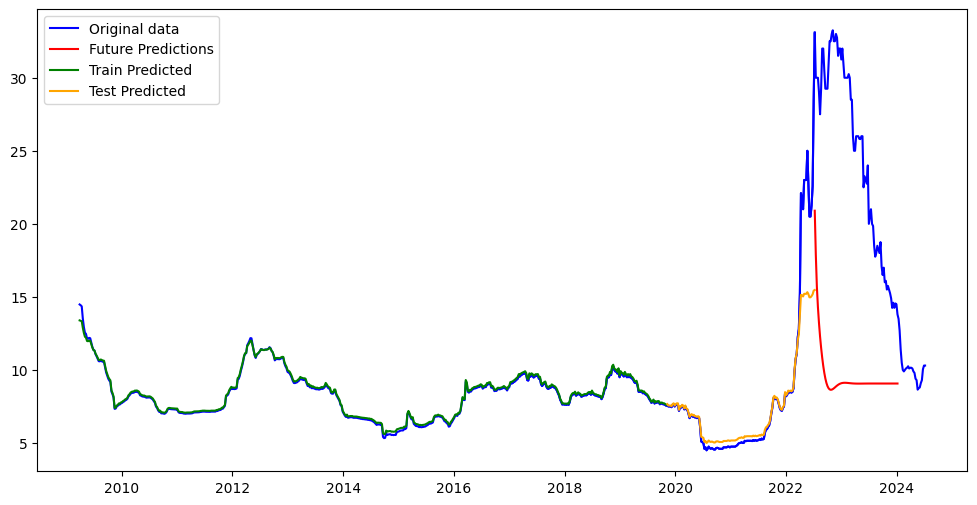

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df3['Price'], color = 'blue' , label = 'Original data')
plt.plot(df2['Price'], color = 'blue')
plt.plot(curr_df['Price'], color = 'red', label = 'Future Predictions')
plt.plot(combined_df['Train Predictions'], color='green', label='Train Predicted')
plt.plot(combined_df['Test Predictions'], color='orange', label='Test Predicted')
plt.legend()
plt.show()